In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

np.random.seed(0)  # for reproducibility

# Number of samples
n_samples = 500
m_samples = 400

# Generate 'Credit' and 'Income' (x features)
credit = np.random.normal(650, 100, n_samples)  # Average credit score
income = np.random.normal(5000, 800, n_samples)  # Average income in $

# Generate 'Potential Credit' and 'Potential Income' (r features)
# We assume that potential features are normally distributed around some transformation of the current features
potential_credit = credit + np.random.normal(50, 50, n_samples)  # Average increase in credit score
potential_income = income * np.random.normal(1.1, 0.05, n_samples)  # Average increase in income

# Combine into a DataFrame
data = pd.DataFrame({
    'Credit': credit,
    'Income': income,
    'Potential Credit': potential_credit,
    'Potential Income': potential_income
})


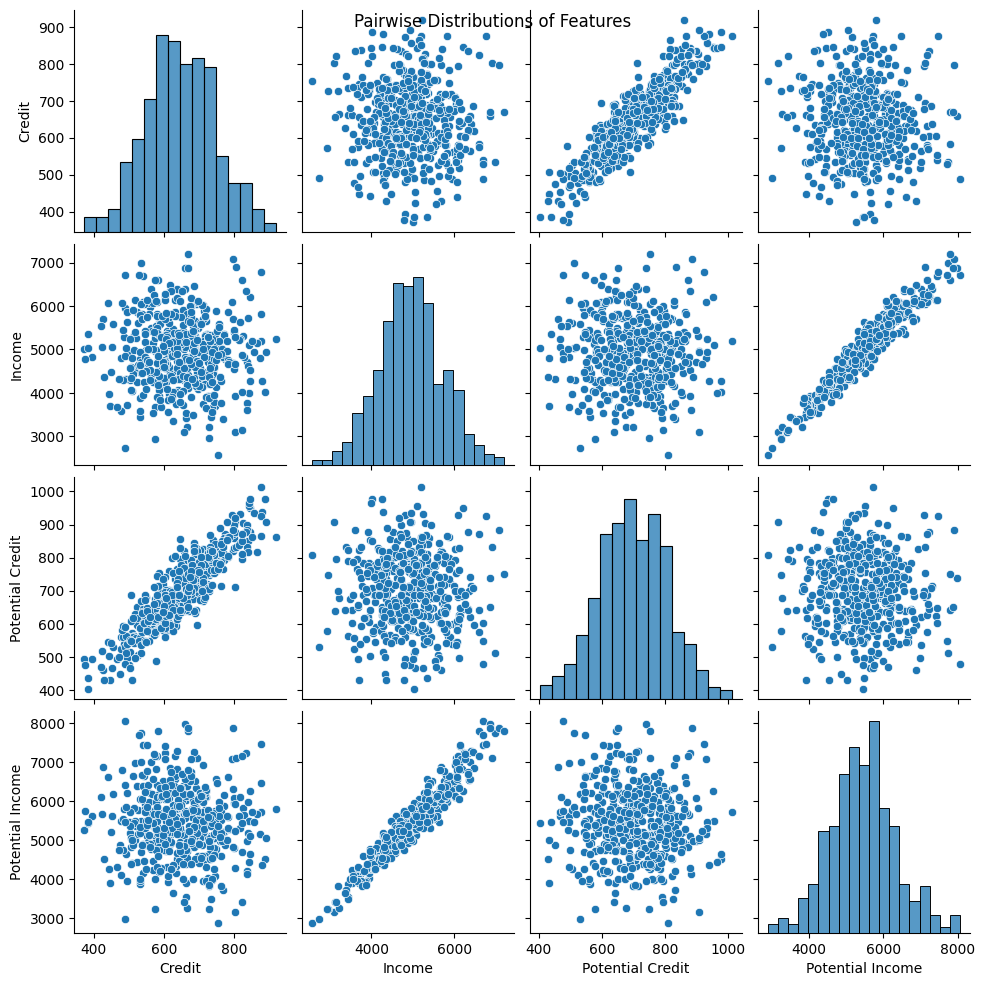

Correlation matrix:
                     Credit    Income  Potential Credit  Potential Income
Credit            1.000000 -0.040796          0.896563         -0.053864
Income           -0.040796  1.000000         -0.041442          0.961503
Potential Credit  0.896563 -0.041442          1.000000         -0.058812
Potential Income -0.053864  0.961503         -0.058812          1.000000


In [2]:
# Pairplot to visualize relationships
sns.pairplot(data)
plt.suptitle('Pairwise Distributions of Features')
plt.show()

# Calculate and display correlation matrix
corr_matrix = data.corr()
print("Correlation matrix:\n", corr_matrix)


C:\Users\leiyo\AppData\Local\Temp\ipykernel_13464\1185942365.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['Credit'], y=data['Potential Credit'], ax=axes[0], cmap="Reds", shade=True, bw_adjust=.5)
C:\Users\leiyo\AppData\Local\Temp\ipykernel_13464\1185942365.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['Income'], y=data['Potential Income'], ax=axes[1], cmap="Blues", shade=True, bw_adjust=.5)


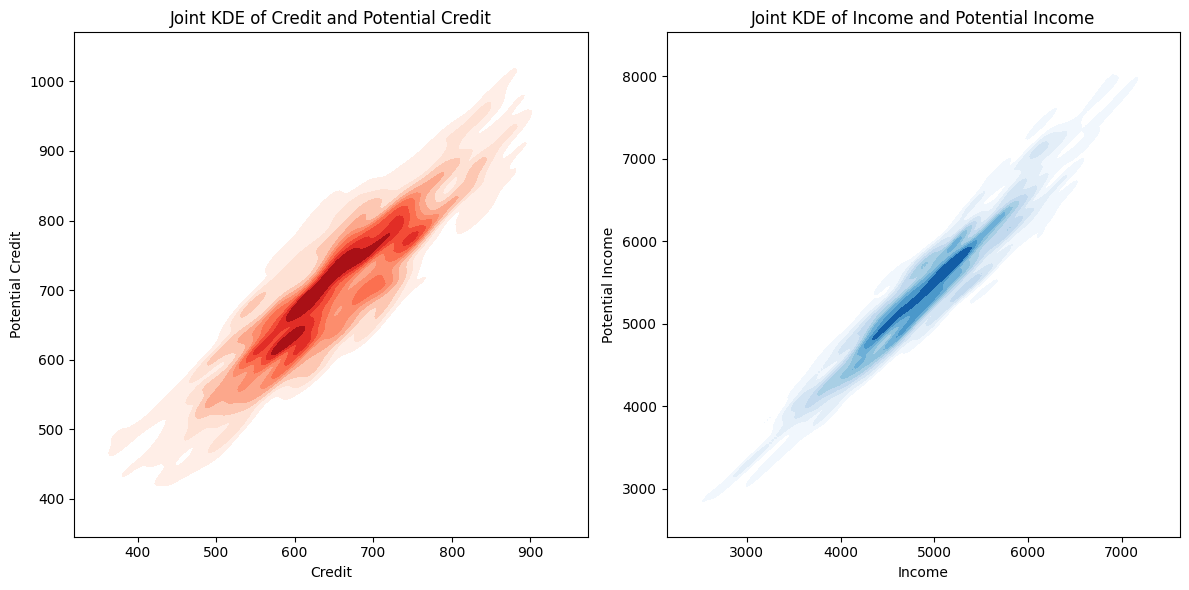

In [3]:
# Setting up the KDE plots for 'Credit' vs 'Potential Credit' and 'Income' vs 'Potential Income'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# KDE for Credit scores
sns.kdeplot(x=data['Credit'], y=data['Potential Credit'], ax=axes[0], cmap="Reds", shade=True, bw_adjust=.5)
axes[0].set_title('Joint KDE of Credit and Potential Credit')
axes[0].set_xlabel('Credit')
axes[0].set_ylabel('Potential Credit')

# KDE for Income
sns.kdeplot(x=data['Income'], y=data['Potential Income'], ax=axes[1], cmap="Blues", shade=True, bw_adjust=.5)
axes[1].set_title('Joint KDE of Income and Potential Income')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Potential Income')

plt.tight_layout()
plt.show()

       Credit  Potential Credit  Credit Probability       Income  \
0  826.405235        904.203369            0.000706  5306.185944   
1  690.015721        784.639415            0.002517  4972.606176   
2  747.873798        776.758057            0.002339  5877.077477   
3  874.089320        929.325021            0.000454  4812.627359   
4  836.755799        898.158465            0.000713  4722.039478   

   Potential Income  Income Probability  
0       5840.317172            0.003534  
1       5439.547588            0.003923  
2       6564.419100            0.001331  
3       5152.006130            0.003203  
4       4982.739557            0.002711  


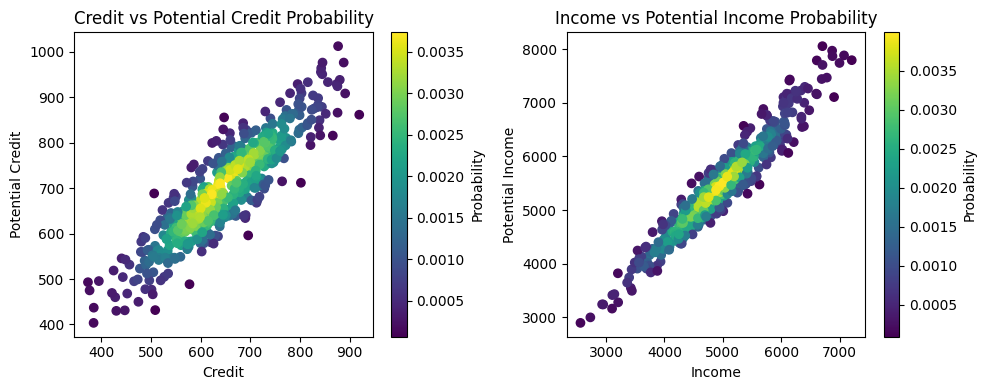

In [12]:
# Prepare data for KDE
credit_data = np.vstack([data['Credit'], data['Potential Credit']])
income_data = np.vstack([data['Income'], data['Potential Income']])

# Create KDE models
credit_kde = gaussian_kde(credit_data)
income_kde = gaussian_kde(income_data)

credit_density = credit_kde(credit_data)
income_density = income_kde(income_data)

credit_probability = credit_density / np.sum(credit_density)
income_probability = income_density / np.sum(income_density)

# Evaluate KDE for each pair
data['Credit Probability'] = credit_probability
data['Income Probability'] = income_probability

# Print some of the results
print(data[['Credit', 'Potential Credit', 'Credit Probability', 'Income', 'Potential Income', 'Income Probability']].head())

# Optionally, visualize the KDE as a scatter plot with density coloring
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sc = plt.scatter(data['Credit'], data['Potential Credit'], c=data['Credit Probability'], cmap='viridis')
plt.colorbar(sc, label='Probability')
plt.title('Credit vs Potential Credit Probability')
plt.xlabel('Credit')
plt.ylabel('Potential Credit')

plt.subplot(1, 2, 2)
sc = plt.scatter(data['Income'], data['Potential Income'], c=data['Income Probability'], cmap='viridis')
plt.colorbar(sc, label='Probability')
plt.title('Income vs Potential Income Probability')
plt.xlabel('Income')
plt.ylabel('Potential Income')

plt.tight_layout()
plt.show()